## Importing libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

## Connecting google drive and importing data

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv("/content/drive/MyDrive/ilab/dataset/pd_speech_features.csv")

In [4]:
df.head()

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
0,0,1,0.85247,0.71826,0.57227,240,239,0.008064,0.000087,0.00218,...,1.5620,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405,1
1,0,1,0.76686,0.69481,0.53966,234,233,0.008258,0.000073,0.00195,...,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.1780,1
2,0,1,0.85083,0.67604,0.58982,232,231,0.008340,0.000060,0.00176,...,1.5643,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666,1
3,1,0,0.41121,0.79672,0.59257,178,177,0.010858,0.000183,0.00419,...,3.7805,3.5664,5.2558,14.0403,4.2235,4.6857,4.8460,6.2650,4.0603,1
4,1,0,0.32790,0.79782,0.53028,236,235,0.008162,0.002669,0.00535,...,6.1727,5.8416,6.0805,5.7621,7.7817,11.6891,8.2103,5.0559,6.1164,1


In [5]:
df.describe()

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
count,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,...,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000
mean,125.500000,0.515873,0.746284,0.700414,0.489058,323.972222,322.678571,0.006360,0.000383,0.002324,...,26.237251,22.840337,18.587888,13.872018,12.218953,12.375335,14.799230,14.751559,31.481110,0.746032
std,72.793721,0.500079,0.169294,0.069718,0.137442,99.219059,99.402499,0.001826,0.000728,0.002628,...,42.220693,32.626464,25.537464,20.046029,17.783642,16.341665,15.722502,14.432979,34.230991,0.435568
min,0.000000,0.000000,0.041551,0.543500,0.154300,2.000000,1.000000,0.002107,0.000011,0.000210,...,1.509800,1.531700,1.582900,1.747200,1.789500,1.628700,1.861700,1.955900,2.364000,0.000000
25%,62.750000,0.000000,0.762833,0.647053,0.386537,251.000000,250.000000,0.005003,0.000049,0.000970,...,2.408675,3.452800,3.354825,3.077450,2.937025,3.114375,3.665925,3.741275,3.948750,0.000000
50%,125.500000,1.000000,0.809655,0.700525,0.484355,317.000000,316.000000,0.006048,0.000077,0.001495,...,5.586300,7.062750,6.077400,4.770850,4.300450,4.741450,6.725700,7.334250,10.637250,1.000000
75%,188.250000,1.000000,0.834315,0.754985,0.586515,384.250000,383.250000,0.007528,0.000171,0.002520,...,28.958075,29.830850,21.944050,13.188000,10.876150,12.201325,21.922050,22.495175,61.125325,1.000000
max,251.000000,1.000000,0.907660,0.852640,0.871230,907.000000,905.000000,0.012966,0.003483,0.027750,...,239.788800,203.311300,121.542900,102.207000,85.571700,73.532200,62.007300,57.544300,156.423700,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Columns: 755 entries, id to class
dtypes: float64(749), int64(6)
memory usage: 4.4 MB


In [7]:
df['class'].value_counts()

,count
class,
1,564
0,192


In [8]:
updated_df = df.copy().drop(columns=['id', 'class'], axis=1)

In [9]:
updated_df.shape

(756, 753)

## Getting the target variable and important features and transforming the data




In [10]:
y = df['class']

In [11]:
X = df[['mean_MFCC_11th_coef', 'tqwt_TKEO_mean_dec_19', 'mean_12th_delta_delta', 'tqwt_entropy_shannon_dec_3', 'locPctJitter',
        'tqwt_TKEO_mean_dec_1', 'IMF_SNR_entropy', 'app_LT_TKEO_std_9_coef', 'tqwt_energy_dec_8', 'tqwt_TKEO_mean_dec_26',
        'tqwt_entropy_shannon_dec_11', 'Ed2_10_coef', 'tqwt_TKEO_mean_dec_36', 'tqwt_energy_dec_19', 'tqwt_TKEO_std_dec_20',
        'tqwt_medianValue_dec_12', 'f4', 'tqwt_skewnessValue_dec_5', 'tqwt_medianValue_dec_10', 'det_TKEO_mean_6_coef', 'det_LT_TKEO_std_7_coef',
        'tqwt_stdValue_dec_3', 'tqwt_medianValue_dec_11', 'det_LT_entropy_log_9_coef', 'GNE_NSR_SEO', 'tqwt_medianValue_dec_22',
        'mean_11th_delta_delta', 'tqwt_stdValue_dec_21', 'tqwt_skewnessValue_dec_8', 'det_LT_entropy_shannon_6_coef', 'tqwt_TKEO_std_dec_26',
        'tqwt_medianValue_dec_35', 'tqwt_medianValue_dec_32', 'tqwt_kurtosisValue_dec_34', 'tqwt_entropy_shannon_dec_2', 'tqwt_skewnessValue_dec_12',
        'app_det_TKEO_mean_3_coef', 'tqwt_minValue_dec_22', 'tqwt_meanValue_dec_31', 'mean_MFCC_6th_coef', 'std_4th_delta', 'tqwt_meanValue_dec_22',
        'tqwt_meanValue_dec_25', 'tqwt_energy_dec_23', 'tqwt_TKEO_std_dec_23', 'tqwt_skewnessValue_dec_30', 'tqwt_entropy_shannon_dec_33',
        'det_TKEO_mean_10_coef', 'mean_MFCC_12th_coef', 'mean_MFCC_8th_coef', 'tqwt_medianValue_dec_26', 'app_LT_TKEO_std_10_coef', 'VFER_std',
        'VFER_NSR_TKEO', 'mean_MFCC_10th_coef', 'tqwt_meanValue_dec_18', 'tqwt_meanValue_dec_16', 'mean_10th_delta', 'tqwt_entropy_shannon_dec_26',
        'mean_delta_delta_0th', 'minIntensity', 'rapJitter', 'b1', 'tqwt_TKEO_std_dec_29', 'tqwt_maxValue_dec_19', 'tqwt_TKEO_std_dec_27',
        'Ed_6_coef', 'tqwt_meanValue_dec_1', 'det_LT_entropy_shannon_9_coef', 'tqwt_entropy_shannon_dec_29', 'mean_4th_delta_delta',
        'tqwt_skewnessValue_dec_20', 'app_LT_TKEO_mean_10_coef', 'tqwt_entropy_shannon_dec_36', 'tqwt_energy_dec_32', 'tqwt_maxValue_dec_21',
        'std_4th_delta_delta', 'tqwt_stdValue_dec_34', 'tqwt_TKEO_std_dec_8', 'tqwt_TKEO_std_dec_11', 'tqwt_skewnessValue_dec_16',
        'Ed_1_coef', 'tqwt_skewnessValue_dec_10', 'tqwt_meanValue_dec_4', 'tqwt_meanValue_dec_5', 'tqwt_meanValue_dec_29', 'tqwt_entropy_shannon_dec_21',
        'tqwt_meanValue_dec_20', 'IMF_NSR_TKEO', 'mean_6th_delta', 'tqwt_entropy_shannon_dec_32', 'det_LT_TKEO_mean_7_coef', 'tqwt_kurtosisValue_dec_17',
        'tqwt_kurtosisValue_dec_30', 'tqwt_maxValue_dec_22', 'mean_delta_delta_log_energy', 'std_MFCC_5th_coef', 'mean_9th_delta_delta',
        'tqwt_stdValue_dec_27', 'tqwt_TKEO_mean_dec_29', 'mean_10th_delta_delta', 'tqwt_TKEO_mean_dec_2', 'tqwt_entropy_shannon_dec_34',
        'tqwt_energy_dec_28', 'tqwt_meanValue_dec_32', 'tqwt_kurtosisValue_dec_27', 'tqwt_medianValue_dec_19', 'tqwt_minValue_dec_31',
        'det_LT_entropy_shannon_4_coef', 'GNE_SNR_TKEO', 'det_LT_entropy_log_10_coef', 'tqwt_medianValue_dec_2', 'tqwt_minValue_dec_29',
        'mean_7th_delta', 'Ed_9_coef', 'tqwt_maxValue_dec_31', 'std_5th_delta_delta', 'tqwt_meanValue_dec_30', 'std_5th_delta', 'tqwt_energy_dec_22',
        'tqwt_entropy_shannon_dec_18', 'tqwt_energy_dec_24', 'mean_1st_delta_delta', 'tqwt_entropy_shannon_dec_4', 'mean_5th_delta_delta',
        'b2', 'tqwt_kurtosisValue_dec_28', 'mean_4th_delta', 'tqwt_skewnessValue_dec_1', 'tqwt_energy_dec_26', 'tqwt_entropy_shannon_dec_23',
        'app_LT_entropy_log_1_coef', 'tqwt_energy_dec_11', 'std_6th_delta_delta', 'Ed2_7_coef', 'IMF_SNR_SEO', 'ddpJitter', 'mean_delta_log_energy',
        'tqwt_meanValue_dec_24', 'app_LT_entropy_log_2_coef', 'tqwt_kurtosisValue_dec_8', 'tqwt_TKEO_std_dec_30', 'tqwt_skewnessValue_dec_34',
        'mean_MFCC_1st_coef', 'b4', 'tqwt_meanValue_dec_19', 'det_TKEO_std_10_coef', 'tqwt_minValue_dec_28', 'tqwt_maxValue_dec_27', 'f3', 'Ea',
        'tqwt_skewnessValue_dec_13', 'det_LT_TKEO_std_6_coef', 'det_TKEO_std_3_coef', 'mean_11th_delta', 'Ed2_2_coef', 'tqwt_skewnessValue_dec_21',
        'tqwt_TKEO_mean_dec_18', 'tqwt_kurtosisValue_dec_29', 'tqwt_entropy_log_dec_26', 'app_LT_entropy_shannon_7_coef', 'tqwt_energy_dec_21',
        'Ed2_3_coef', 'tqwt_kurtosisValue_dec_12', 'tqwt_medianValue_dec_5', 'tqwt_skewnessValue_dec_19', 'tqwt_TKEO_std_dec_34', 'mean_MFCC_9th_coef',
        'mean_12th_delta', 'tqwt_medianValue_dec_30', 'tqwt_stdValue_dec_29', 'tqwt_skewnessValue_dec_9', 'tqwt_meanValue_dec_11',
        'det_TKEO_std_4_coef', 'tqwt_skewnessValue_dec_33', 'mean_2nd_delta_delta', 'det_TKEO_mean_7_coef', 'tqwt_medianValue_dec_8',
        'det_LT_TKEO_mean_2_coef', 'tqwt_skewnessValue_dec_31', 'tqwt_meanValue_dec_6', 'tqwt_skewnessValue_dec_22', 'app_LT_TKEO_mean_1_coef',
        'tqwt_kurtosisValue_dec_14', 'b3', 'tqwt_kurtosisValue_dec_31', 'det_entropy_shannon_4_coef', 'tqwt_medianValue_dec_25',
        'app_LT_entropy_log_4_coef', 'tqwt_kurtosisValue_dec_33', 'tqwt_kurtosisValue_dec_7', 'det_LT_TKEO_mean_10_coef', 'tqwt_meanValue_dec_26',
        'tqwt_skewnessValue_dec_7', 'tqwt_TKEO_std_dec_32', 'tqwt_entropy_shannon_dec_30', 'tqwt_meanValue_dec_35', 'tqwt_TKEO_mean_dec_22',
        'tqwt_meanValue_dec_14', 'tqwt_TKEO_mean_dec_8', 'GNE_std', 'tqwt_medianValue_dec_34', 'GQ_std_cycle_closed', 'tqwt_skewnessValue_dec_25',
        'tqwt_TKEO_std_dec_3', 'ddaShimmer', 'tqwt_skewnessValue_dec_14', 'det_LT_TKEO_std_4_coef', 'tqwt_meanValue_dec_10', 'tqwt_TKEO_std_dec_19',
        'tqwt_entropy_log_dec_25', 'tqwt_kurtosisValue_dec_13', 'tqwt_medianValue_dec_15', 'app_LT_TKEO_mean_9_coef', 'tqwt_skewnessValue_dec_2',
        'tqwt_medianValue_dec_3', 'mean_8th_delta', 'tqwt_medianValue_dec_1', 'tqwt_kurtosisValue_dec_18', 'tqwt_TKEO_mean_dec_34',
        'tqwt_stdValue_dec_31', 'tqwt_kurtosisValue_dec_10', 'tqwt_TKEO_mean_dec_28', 'locDbShimmer', 'mean_3rd_delta',
        'app_LT_entropy_shannon_8_coef', 'tqwt_skewnessValue_dec_32', 'tqwt_meanValue_dec_15', 'tqwt_meanValue_dec_8', 'det_LT_TKEO_std_10_coef',
        'tqwt_skewnessValue_dec_35', 'stdDevPeriodPulses', 'tqwt_meanValue_dec_9', 'tqwt_meanValue_dec_33', 'tqwt_meanValue_dec_34',
        'tqwt_TKEO_std_dec_22', 'tqwt_TKEO_mean_dec_11', 'tqwt_kurtosisValue_dec_19', 'tqwt_skewnessValue_dec_24', 'tqwt_medianValue_dec_24',
        'tqwt_skewnessValue_dec_26', 'tqwt_entropy_shannon_dec_22', 'tqwt_TKEO_mean_dec_21', 'mean_8th_delta_delta', 'tqwt_medianValue_dec_4',
        'app_LT_entropy_shannon_6_coef', 'tqwt_maxValue_dec_8', 'tqwt_skewnessValue_dec_28', 'std_delta_log_energy', 'tqwt_maxValue_dec_28',
        'tqwt_TKEO_std_dec_36', 'tqwt_meanValue_dec_17', 'tqwt_entropy_shannon_dec_25', 'GNE_mean', 'tqwt_stdValue_dec_2',
        'tqwt_medianValue_dec_17', 'locShimmer', 'IMF_SNR_TKEO', 'tqwt_TKEO_std_dec_33', 'tqwt_entropy_log_dec_23', 'tqwt_skewnessValue_dec_18',
        'tqwt_medianValue_dec_18', 'det_LT_entropy_shannon_5_coef', 'tqwt_TKEO_mean_dec_24', 'tqwt_maxValue_dec_36', 'tqwt_TKEO_std_dec_4',
        'tqwt_TKEO_std_dec_2', 'tqwt_medianValue_dec_20', 'tqwt_maxValue_dec_29', 'tqwt_medianValue_dec_9', 'VFER_SNR_TKEO',
        'tqwt_entropy_log_dec_36', 'app_TKEO_std_4_coef', 'tqwt_skewnessValue_dec_11', 'tqwt_stdValue_dec_33', 'det_TKEO_mean_4_coef',
        'tqwt_skewnessValue_dec_29', 'VFER_SNR_SEO', 'tqwt_TKEO_mean_dec_3', 'tqwt_meanValue_dec_2', 'tqwt_minValue_dec_27', 'tqwt_skewnessValue_dec_23',
        'tqwt_TKEO_mean_dec_25', 'tqwt_medianValue_dec_13', 'tqwt_kurtosisValue_dec_15', 'tqwt_meanValue_dec_13', 'tqwt_meanValue_dec_23',
        'tqwt_meanValue_dec_21', 'tqwt_stdValue_dec_28', 'tqwt_minValue_dec_23', 'tqwt_TKEO_std_dec_5', 'det_LT_TKEO_std_2_coef', 'tqwt_meanValue_dec_7',
        'tqwt_skewnessValue_dec_15', 'det_LT_entropy_shannon_7_coef', 'tqwt_minValue_dec_8', 'GQ_prc5_95', 'tqwt_stdValue_dec_23', 'tqwt_meanValue_dec_28',
        'tqwt_kurtosisValue_dec_32', 'tqwt_kurtosisValue_dec_26', 'tqwt_minValue_dec_21', 'apq5Shimmer', 'app_LT_entropy_log_3_coef',
        'det_LT_entropy_shannon_10_coef', 'app_LT_TKEO_mean_8_coef', 'tqwt_energy_dec_2', 'tqwt_energy_dec_6', 'tqwt_skewnessValue_dec_6',
        'tqwt_skewnessValue_dec_3', 'det_TKEO_std_7_coef', 'mean_7th_delta_delta', 'mean_3rd_delta_delta', 'Ed2_6_coef', 'tqwt_medianValue_dec_6',
        'det_entropy_shannon_10_coef', 'locAbsJitter', 'tqwt_TKEO_mean_dec_32', 'det_entropy_log_1_coef', 'app_LT_entropy_shannon_5_coef',
        'tqwt_kurtosisValue_dec_20', 'tqwt_entropy_shannon_dec_24', 'tqwt_energy_dec_3', 'Ed_7_coef', 'tqwt_entropy_shannon_dec_1', 'tqwt_energy_dec_18',
        'tqwt_kurtosisValue_dec_16', 'ppq5Jitter', 'apq3Shimmer', 'det_LT_TKEO_std_3_coef', 'mean_1st_delta', 'tqwt_kurtosisValue_dec_21',
        'tqwt_medianValue_dec_23', 'mean_0th_delta', 'tqwt_kurtosisValue_dec_9', 'tqwt_medianValue_dec_27', 'tqwt_skewnessValue_dec_36',
        'tqwt_TKEO_std_dec_24', 'tqwt_stdValue_dec_22', 'tqwt_entropy_shannon_dec_8', 'tqwt_medianValue_dec_33', 'tqwt_medianValue_dec_29',
        'tqwt_energy_dec_31', 'tqwt_entropy_shannon_dec_27', 'std_6th_delta', 'det_entropy_shannon_7_coef', 'tqwt_TKEO_mean_dec_27',
        'tqwt_medianValue_dec_16', 'GNE_NSR_TKEO', 'tqwt_energy_dec_20', 'tqwt_TKEO_mean_dec_23', 'tqwt_minValue_dec_9', 'tqwt_stdValue_dec_19',
        'tqwt_TKEO_mean_dec_33', 'tqwt_skewnessValue_dec_4', 'mean_5th_delta', 'mean_2nd_delta', 'tqwt_entropy_shannon_dec_28', 'std_2nd_delta',
        'tqwt_energy_dec_27', 'tqwt_TKEO_mean_dec_4', 'tqwt_medianValue_dec_7', 'tqwt_kurtosisValue_dec_24', 'Ed2_9_coef', 'tqwt_skewnessValue_dec_17',
        'tqwt_meanValue_dec_3', 'tqwt_stdValue_dec_4', 'tqwt_medianValue_dec_21', 'mean_6th_delta_delta', 'tqwt_kurtosisValue_dec_25',
        'tqwt_skewnessValue_dec_27', 'tqwt_medianValue_dec_31', 'tqwt_kurtosisValue_dec_35', 'tqwt_maxValue_dec_23', 'det_LT_entropy_shannon_3_coef',
        'tqwt_meanValue_dec_27', 'mean_9th_delta', 'GNE_SNR_SEO', 'tqwt_energy_dec_34', 'tqwt_meanValue_dec_12', 'tqwt_medianValue_dec_14',
        'tqwt_minValue_dec_19', 'app_LT_entropy_shannon_10_coef', 'tqwt_medianValue_dec_28', 'tqwt_kurtosisValue_dec_11', 'std_2nd_delta_delta',
        'tqwt_TKEO_mean_dec_30']]

In [12]:
X.head()

,mean_MFCC_11th_coef,tqwt_TKEO_mean_dec_19,mean_12th_delta_delta,tqwt_entropy_shannon_dec_3,locPctJitter,tqwt_TKEO_mean_dec_1,IMF_SNR_entropy,app_LT_TKEO_std_9_coef,tqwt_energy_dec_8,tqwt_TKEO_mean_dec_26,...,GNE_SNR_SEO,tqwt_energy_dec_34,tqwt_meanValue_dec_12,tqwt_medianValue_dec_14,tqwt_minValue_dec_19,app_LT_entropy_shannon_10_coef,tqwt_medianValue_dec_28,tqwt_kurtosisValue_dec_11,std_2nd_delta_delta,tqwt_TKEO_mean_dec_30
0,-0.006825,0.064414,0.000027,0.091515,0.00218,1.610000e-07,23.2610,4188.2456,0.000376,0.077560,...,1200445.612,0.000002,-2.630000e-21,0.000560,-0.59600,-3601122.613,0.056236,4.6068,0.066410,0.000044
1,0.057552,0.068347,-0.000109,0.122710,0.00195,3.050000e-07,21.8851,4148.9889,0.000276,0.043337,...,1298455.445,0.000003,-3.770000e-20,-0.000146,-0.47909,-3563560.603,0.004587,13.6965,0.077256,0.000081
2,0.286980,0.035857,-0.000298,0.055977,0.00176,1.790000e-07,41.7310,4127.0967,0.000352,0.019365,...,1272869.841,0.000006,2.580000e-21,0.000045,-0.43444,-3539902.400,-0.004803,4.0864,0.068545,0.000072
3,-0.754270,0.033062,-0.000080,2.709800,0.00419,2.580000e-06,35.8179,3910.7029,0.000132,0.432670,...,1932289.206,0.000069,-3.160000e-20,0.000644,-0.52657,-3271399.011,0.000873,100.3649,0.030155,0.018764
4,-0.880070,0.033136,0.000035,3.948500,0.00535,2.440000e-06,31.5211,4297.4639,0.000136,0.498140,...,1861807.802,0.000041,-3.590000e-20,-0.000317,-0.45541,-3367165.736,-0.000449,34.0835,0.030160,0.008679


In [13]:
X.shape

(756, 387)

## Transforming data

In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [15]:
X=scaler.fit_transform(X)

In [16]:
X

array([[ 0.52443522, -0.26794496,  0.10935538, ..., -0.18579946,
         3.59820869, -0.10109023],
       [ 0.63243296, -0.24596117, -0.34284415, ...,  0.0466746 ,
         4.60274342, -0.10059345],
       [ 1.01731922, -0.42756637, -0.97630425, ..., -0.19910897,
         3.7959481 , -0.10071798],
       ...,
       [ 1.04770039, -0.01436843,  0.68099249, ..., -0.21537246,
        -0.70899096, -0.09445713],
       [ 1.64202042, -0.20207744,  0.34582577, ..., -0.20668956,
         0.53468342, -0.03784707],
       [ 0.92500141, -0.06132084,  0.43196379, ..., -0.19918058,
        -0.26257225, -0.09339958]])

The scaler transformation using StandardScalar from scikit-learn to make sure the features are on the same scale.

## Splitting the dataset into training and testing data

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=12)

In [18]:
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train, test_size=0.2, random_state=12)

The train, validation and test data is split in 80-20 ratio for each as there are 756 records. Since the number of records is enough with 759 features to train the model we use the validation set to test the model performance after training a baseline model.

## Defining Random Forest Classifier Model

In [19]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

Training the model

In [20]:
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [21]:
train_pred = rfc.predict(X_train)

In [22]:
from sklearn.metrics import accuracy_score, f1_score, precision_recall_curve, roc_auc_score, roc_curve, recall_score, precision_score
train_acc = accuracy_score(y_train, train_pred)
train_precision = precision_score(y_train, train_pred)
train_roc_auc_score = roc_auc_score(y_train, train_pred)
train_recall = recall_score(y_train, train_pred)
train_f1 = f1_score(y_train, train_pred)
train_roc_curve = roc_curve(y_train, train_pred)

In [23]:
print(f"The training data accuracy is : {np.round(train_acc, 2)}")
print(f"The training data precision is : {np.round(train_precision, 2)}")
print(f"The training data recall is : {np.round(train_recall, 2)}")
print(f"The training data f1-score is : {np.round(train_f1, 2)}")
print(f"The training data ROC curve is : {np.round(train_roc_curve, 2)}")
print(f"The training data ROC-AUC score is : {np.round(train_roc_auc_score, 2)}")

The training data accuracy is : 1.0
The training data precision is : 1.0
The training data recall is : 1.0
The training data f1-score is : 1.0
The training data ROC curve is : [[ 0.  0.  1.]
 [ 0.  1.  1.]
 [inf  1.  0.]]
The training data ROC-AUC score is : 1.0


*   The accuracy of the Random Forest Classifier baseline model is 1.0. However, since the classes are not balanced, accuracy can be a misleading measure. Hence, F1 score and and ROC-AUC score were calculated.

*   The F1 score considers both precision and recall into account, and the F1 score of the SVC model (1.0) shows that the rate of false negatives is low.

*   The ROC-AUC score on the other hand, evaluates the model performance for the binary classification model. The 1.0 ROC-AUC score means, the model is able to distinguish positive and negative instances 100% of the time which means the model is not making random predictions.


In [24]:
from sklearn.metrics import auc, RocCurveDisplay
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, train_pred)
train_roc_auc = auc(train_fpr, train_tpr)

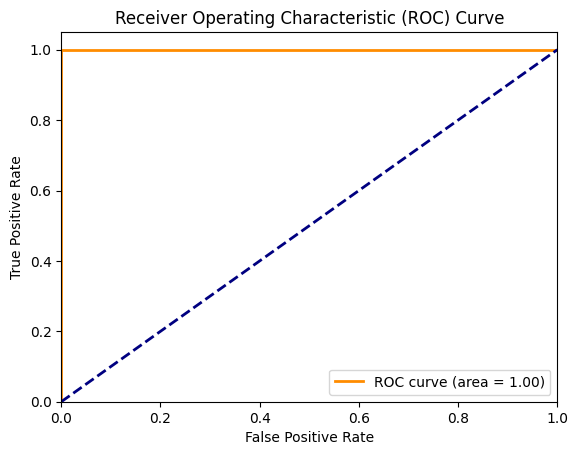

In [25]:
plt.figure()
plt.plot(train_fpr, train_tpr, color='darkorange', lw=2, label=f'ROC curve (area = {train_roc_auc_score:0.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

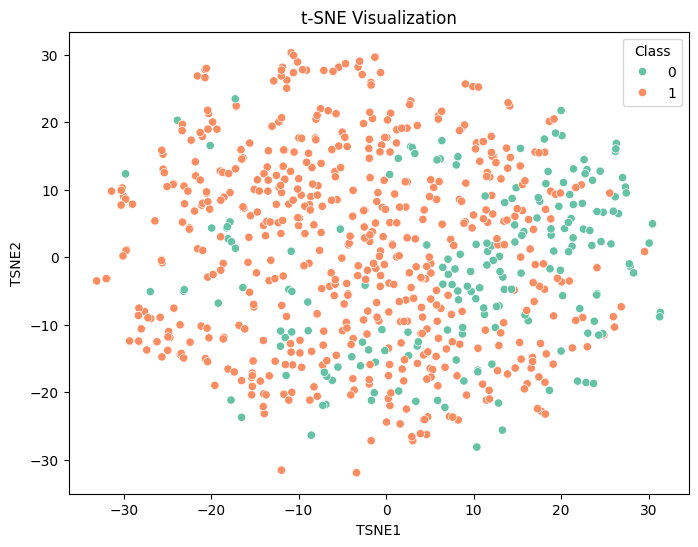

In [26]:
import seaborn as sns
from sklearn.manifold import TSNE

# Apply t-SNE to reduce the dimensions to 2
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

# Create a DataFrame with the t-SNE-transformed data and class labels
tsne_df = pd.DataFrame(data=X_tsne, columns=['TSNE1', 'TSNE2'])
tsne_df['Class'] = y.values

# Visualize the data based on class using a scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=tsne_df, x='TSNE1', y='TSNE2', hue='Class', palette='Set2')
plt.title('t-SNE Visualization')
plt.show()

## Analysing model performance

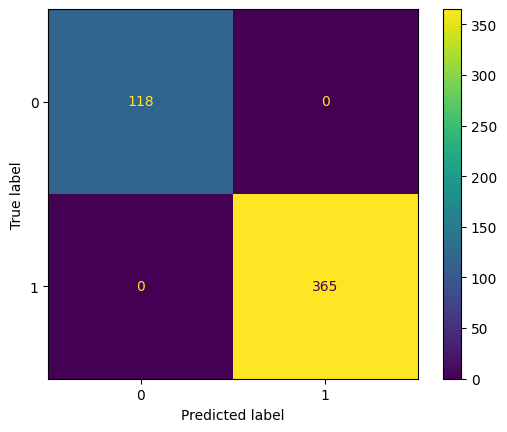

In [27]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

confusion_matrix_va_dt = confusion_matrix(y_train, train_pred)
cm_val_dt = ConfusionMatrixDisplay(confusion_matrix_va_dt)

cm_val_dt.plot()
plt.show()

## Predicting the validation data

In [28]:
val_preds = rfc.predict(X_val)

In [29]:
val_acc = accuracy_score(y_val, val_preds)
val_precision = precision_score(y_val, val_preds)
val_roc_auc_score = roc_auc_score(y_val, val_preds)
val_recall = recall_score(y_val, val_preds)
val_f1 = f1_score(y_val, val_preds)
val_roc_curve = roc_curve(y_val, val_preds)

In [30]:
print(f"The test data accuracy is : {np.round(val_acc, 2)}")
print(f"The test data precision is : {np.round(val_precision, 2)}")
print(f"The test data recall is : {np.round(val_recall, 2)}")
print(f"The test data f1-score is : {np.round(val_f1, 2)}")
print(f"The test data ROC curve is : {np.round(val_roc_curve, 2)}")
print(f"The test data ROC-AUC score is : {np.round(val_roc_auc_score, 2)}")

The test data accuracy is : 0.83
The test data precision is : 0.82
The test data recall is : 0.96
The test data f1-score is : 0.89
The test data ROC curve is : [[0.   0.5  1.  ]
 [0.   0.96 1.  ]
 [ inf 1.   0.  ]]
The test data ROC-AUC score is : 0.73


The testing data ROC-AUC score is lower 0.73 which shows the model is not able to differentiate in positive and negative well on new data. This also explains that the model is overfitting on our baseline model as ROC-AUC score for the baseline model is 1, which reduces to 0.73 when tested on a new data.

In [31]:
val_fpr, val_tpr, val_thresholds = roc_curve(y_val, val_preds)
val_roc_auc = auc(val_fpr, val_tpr)

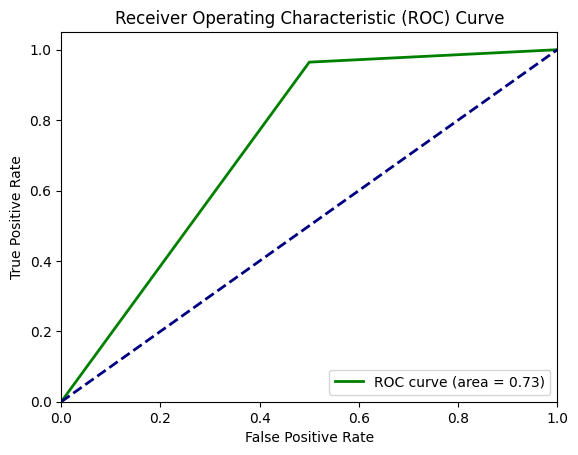

In [32]:
plt.figure()
plt.plot(val_fpr, val_tpr, color='green', lw=2, label=f'ROC curve (area = {val_roc_auc_score:0.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

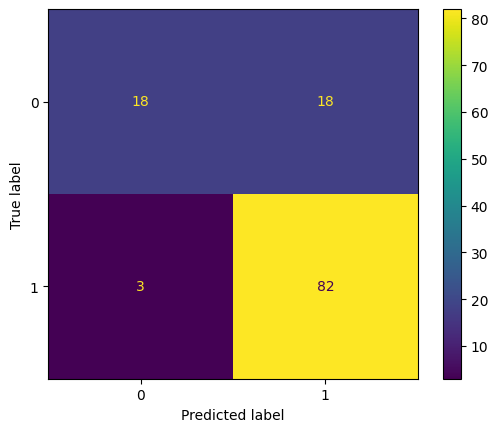

In [33]:
confusion_matrix_val_dt = confusion_matrix(y_val, val_preds)
cm_val_dt = ConfusionMatrixDisplay(confusion_matrix_val_dt)

cm_val_dt.plot()
plt.show()

Testing the trained model on the validation data suggests the model makes very good prediction to predict the PD patients, predicting 97% correctly, however, it misclassifies 50% of the healthy patients.

## Considering all the features

In [34]:
updated_df = scaler.fit_transform(updated_df)

In [35]:
updated_df.shape

(756, 753)

In [36]:
X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(updated_df,y, test_size=0.2, random_state=4)

In [37]:
X_train_full, X_val_full, y_train_full, y_val_full = train_test_split(X_train_full,y_train_full, test_size=0.2, random_state=4)

For the second experiment, we trained the Random Forest Classifier model on entire dataset after removing 'gender' column as it would lead to overfitting if we use the ID for each person and the target column 'status' that we predict later using our baseline trained model.

In [38]:
rfc_full = RandomForestClassifier()

In [39]:
rfc_full.fit(X_train_full, y_train_full)

RandomForestClassifier()

In [40]:
train_pred_full = rfc_full.predict(X_train_full)

In [41]:
train_acc_full = accuracy_score(y_train_full, train_pred_full)
train_precision_full = precision_score(y_train_full, train_pred_full)
train_roc_auc_score_full = roc_auc_score(y_train_full, train_pred_full)
train_recall_full = recall_score(y_train_full, train_pred_full)
train_f1_full = f1_score(y_train_full, train_pred_full)
train_roc_curve_full = roc_curve(y_train_full, train_pred_full)

In [42]:
print(f"The training data accuracy is : {np.round(train_acc_full, 2)}")
print(f"The training data precision is : {np.round(train_precision_full, 2)}")
print(f"The training data recall is : {np.round(train_recall_full, 2)}")
print(f"The training data f1-score is : {np.round(train_f1_full, 2)}")
print(f"The training data ROC curve is : {np.round(train_roc_curve_full, 2)}")
print(f"The training data ROC-AUC score is : {np.round(train_roc_auc_score_full, 2)}")

The training data accuracy is : 1.0
The training data precision is : 1.0
The training data recall is : 1.0
The training data f1-score is : 1.0
The training data ROC curve is : [[ 0.  0.  1.]
 [ 0.  1.  1.]
 [inf  1.  0.]]
The training data ROC-AUC score is : 1.0


However, the results with the entire dataset trained using all the features is not very different from the model trained after feature selection which helps prove the EDA correct and the feature selection as relevant.

In [43]:
train_fpr_full, train_tpr_full, train_thresholds_full = roc_curve(y_train_full, train_pred_full)
train_roc_auc_full = auc(train_fpr_full, train_tpr_full)

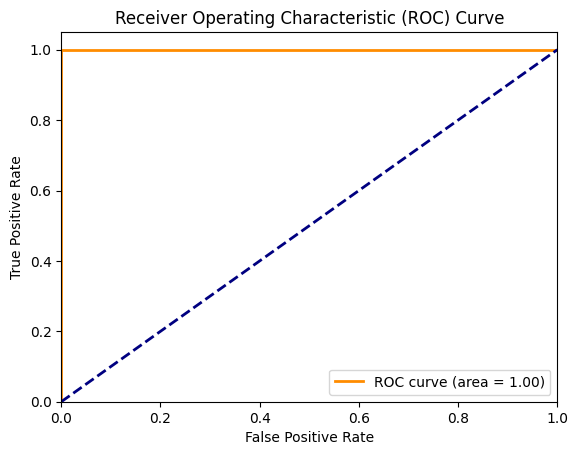

In [44]:
plt.figure()
plt.plot(train_fpr_full, train_tpr_full, color='darkorange', lw=2, label=f'ROC curve (area = {train_roc_auc_score_full:0.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

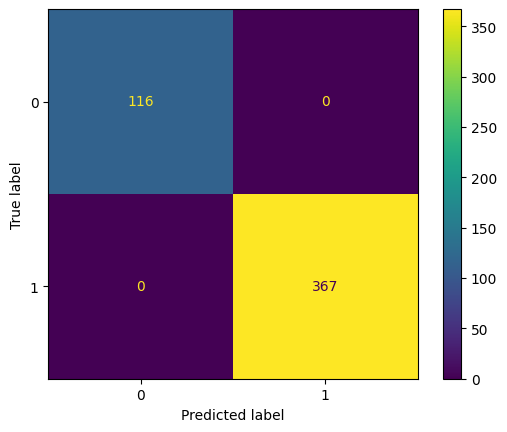

In [45]:
confusion_matrix_va_dt_full = confusion_matrix(y_train_full, train_pred_full)
cm_val_dt_full = ConfusionMatrixDisplay(confusion_matrix_va_dt_full)

cm_val_dt_full.plot()
plt.show()


*   The confusion matrix gives us further understanding of best ROC-AUC score of 1.0. 0 of the negatives have been incorrectly classified as positive. This explains the Random Forest Classifier model trained, is ideal for making correct predictions PD and healthy people.

## Predicting the validation data - on full dataset

In [46]:
val_preds_full = rfc_full.predict(X_val_full)

In [47]:
val_acc_full = accuracy_score(y_val_full, val_preds_full)
val_precision_full = precision_score(y_val_full, val_preds_full)
val_roc_auc_score_full = roc_auc_score(y_val_full, val_preds_full)
val_recall_full = recall_score(y_val_full, val_preds_full)
val_f1_full = f1_score(y_val_full, val_preds_full)
val_roc_curve_full = roc_curve(y_val_full, val_preds_full)

In [48]:
print(f"The test data accuracy is : {np.round(val_acc_full, 2)}")
print(f"The test data precision is : {np.round(val_precision_full, 2)}")
print(f"The test data recall is : {np.round(val_recall_full, 2)}")
print(f"The test data f1-score is : {np.round(val_f1_full, 2)}")
print(f"The test data ROC curve is : {np.round(val_roc_curve_full, 2)}")
print(f"The test data ROC-AUC score is : {np.round(val_roc_auc_score_full, 2)}")

The test data accuracy is : 0.88
The test data precision is : 0.87
The test data recall is : 0.99
The test data f1-score is : 0.92
The test data ROC curve is : [[0.   0.37 1.  ]
 [0.   0.99 1.  ]
 [ inf 1.   0.  ]]
The test data ROC-AUC score is : 0.81


The testing data ROC-AUC score is lower 0.81 which shows the model is not able to differentiate in positive and negative well on new data. This also explains that the model is overfitting on our baseline model as ROC-AUC score for the baseline model is 1, which reduces to 0.81 when tested on a new data.

In [49]:
val_fpr_full, val_tpr_full, val_thresholds_full = roc_curve(y_val_full, val_preds_full)
val_roc_auc_full = auc(val_fpr_full, val_tpr_full)

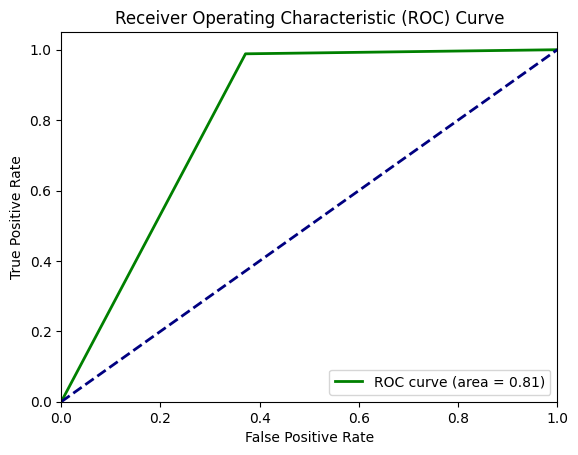

In [50]:
plt.figure()
plt.plot(val_fpr_full, val_tpr_full, color='green', lw=2, label=f'ROC curve (area = {val_roc_auc_score_full:0.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

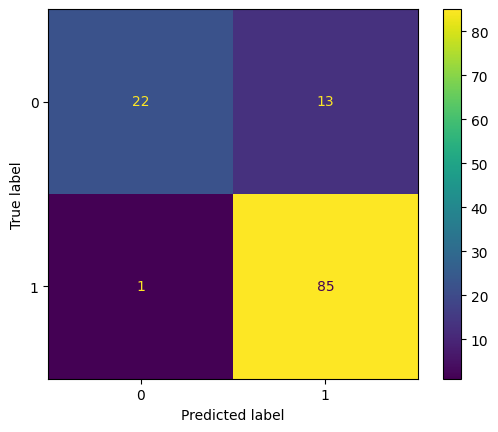

In [51]:
confusion_matrix_val_dt_full = confusion_matrix(y_val_full, val_preds_full)
cm_val_dt_full = ConfusionMatrixDisplay(confusion_matrix_val_dt_full)

cm_val_dt_full.plot()
plt.show()

*   Testing the trained model on the data suggests the model makes very good prediction to predict the PD patients, however, it is only making 63% predictions healty people correctly.
*   However, comparing the above results for validation sets, it is clear that the model learns and performs better when using all the features without performing feature selection for the Random Forest Classifier.

